In [110]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F

In [111]:
mnist_dataset = datasets.MNIST(root = "./data", train = True, download = True)

In [112]:
data, target = mnist_dataset.data, mnist_dataset.targets

In [113]:
train_x, test_x, train_y, test_y = train_test_split(data, target, random_state = 1234, test_size = 0.1, stratify = target)

In [114]:
print(train_x.shape)
print(train_y.shape)

torch.Size([54000, 28, 28])
torch.Size([54000])


In [115]:
class simple_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=8,
            kernel_size=4,
            stride=2,
            padding=0
        )
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=2,
            padding=0
        )
        self.fc1 = nn.Linear(6*6*16, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        

In [116]:
train_x = train_x.reshape(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])

In [117]:
train_y = np.eye(10)[train_y]

In [118]:
train_x = torch.tensor(train_x, dtype = torch.float32)
train_y = torch.tensor(train_y, dtype = torch.float32)

/var/folders/t3/l8scb2b52bdd8cw21j8ly1r40000gn/T/ipykernel_49535/870536590.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x, dtype = torch.float32)


In [119]:

model = simple_CNN()
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.001)
no_of_epoch = 5
all_losses = []

for _ in range(no_of_epoch):
    y_predict = model(train_x)
    loss = loss_fn(y_predict, train_y)
    all_losses.append(loss.detach().numpy())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

In [120]:
print(all_losses)

[array(2.3590152, dtype=float32), array(2.3569224, dtype=float32), array(2.3548136, dtype=float32), array(2.3527007, dtype=float32), array(2.3505945, dtype=float32)]


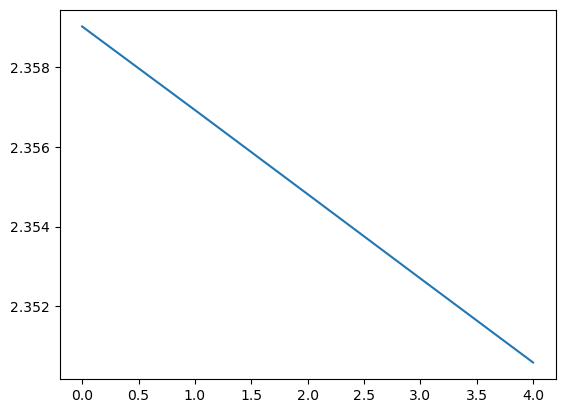

In [121]:
plt.plot(all_losses)